# numpy Testing
### Miki Tebeka .:. [353solutions](http://353solutions.com) .:. Highly effective Python, Scientific Python and Go workshops

We'll explore certain caveats while testing [numpy](http://docs.scipy.org/doc/numpy/reference/) code.

#### TL;DR
Use [np.allclose](http://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html) when comparing numpy arrays. Beware of `nan`.

In [1]:
import numpy as np

## The Naive Approach

In [2]:
def test_mul():
    arr = np.array([0.0, 1.0, 1.1])
    v, expected = 1.1, np.array([0.0, 1.1, 1.21])
    assert arr * v == expected, 'bad multiplication'
    
test_mul()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This is due to the fact that when we compare two numpy arrays with `==` we'll get an array of boolean values comparing each element.

In [3]:
np.array([1,2,3]) == np.array([1, 1, 3])

array([ True, False,  True], dtype=bool)

And the truth value of an array (as the error says) is ambiguous.

In [4]:
bool(np.array([1, 2, 3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We need to use [np.all](http://docs.scipy.org/doc/numpy/reference/generated/numpy.all.html) to check that all elements are equal.

In [5]:
np.all([True, True, True])

True

## Using np.all

In [6]:
def test_mul():
    arr = np.array([0.0, 1.0, 1.1])
    v, expected = 1.1, np.array([0.0, 1.1, 1.21])
    assert np.all(arr * v == expected), 'bad multiplication'
    
test_mul()

AssertionError: bad multiplication

This is due to the fact that floating points are not exact.

In [7]:
1.1 * 1.1

1.2100000000000002

This is *not* a bug in Python but how floating points are implemented. You'll get the same result in C, Java, Go ...
To overcome this we're going to use [np.allclose](http://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html).

BTW: If you're really intersted in floating points, read [this article](http://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html).

## Using np.allclose

In [8]:
def test_mul():
    arr = np.array([0.0, 1.0, 1.1])
    v, expected = 1.1, np.array([0.0, 1.1, 1.21])
    assert np.allclose(arr * v, expected), 'bad multiplication'
    
test_mul()

## Oh nan, Let Me Count the Ways ...

In [10]:
def test_div():
    arr1, arr2 = np.array([1.0, np.inf, 2.0]), np.array([2.0, np.inf, 2.0])
    expected = np.array([0.5, np.nan, 1.0])
    assert np.allclose(arr1 / arr2, expected), 'bad nan'
    
test_div()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


AssertionError: bad nan

This is due to the fact the `nan` does not equal itself.

In [11]:
np.nan == np.nan

False

To check is a number is `nan` we need to use [np.isnan](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html)

In [12]:
np.isnan(np.inf/np.inf)

True

We have two options to solve this:

1. Convert all `nan` to numbers
2. Use `equal_nan` argument to `np.allclose`

## Option 1: Convert `nan` to Numbers

In [14]:
def test_div():
    arr1, arr2 = np.array([1.0, np.inf, 2.0]), np.array([2.0, np.inf, 2.0])
    expected = np.array([0.5, np.nan, 1.0])
    result = arr1 / arr2
    
    result[np.isnan(result)] = 0.0
    expected[np.isnan(expected)] = 0.0
    # or
    # expected = np.nan_to_num(expected)
    assert np.allclose(result, expected), 'bad nan'
    
test_div()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


## Option 2: Use `equal_nan` in `np.allclose`

In [15]:
def test_div():
    arr1, arr2 = np.array([1.0, np.inf, 2.0]), np.array([2.0, np.inf, 2.0])
    expected = np.array([0.5, np.nan, 1.0])
    assert np.allclose(arr1 / arr2, expected, equal_nan=True), 'bad nan'
    
test_div()

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


## State of Things

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

%matplotlib inline
import matplotlib.pyplot as plt

digits = load_digits()

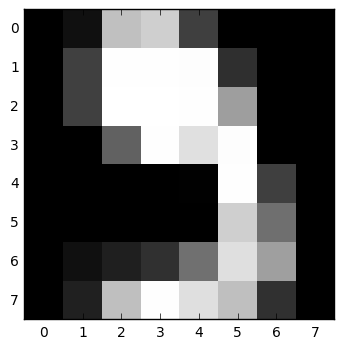

In [19]:
plt.imshow(digits.images[73], interpolation='none', cmap=plt.cm.gray)

In [20]:
digits.target[73]

9

In [21]:
X_test, X_train, y_test, y_train = \
    train_test_split(digits.data, digits.target, test_size=0.3)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91487669053301512

In [22]:
X_test, X_train, y_test, y_train = \
    train_test_split(digits.data, digits.target, test_size=0.3)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91010342084327767

In [23]:
random_state = 21
X_test, X_train, y_test, y_train = \
    train_test_split(digits.data, digits.target, test_size=0.3, random_state=random_state)
clf = RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.89260143198090691

In [24]:
random_state = 21
X_test, X_train, y_test, y_train = \
    train_test_split(digits.data, digits.target, test_size=0.3, random_state=random_state)
clf = RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.89260143198090691